In [1]:
    # auto reload jupyter notebook
    %load_ext autoreload
    %autoreload 2

    import os

    import torch
    from moondream2.config import MoondreamConfig
    from moondream2.moondream import MoondreamModel
    import torch.profiler
    with torch.inference_mode():
        config = MoondreamConfig()
        device = "cuda" if torch.cuda.is_available() else "cpu"
        model = MoondreamModel(config, setup_caches=False)
        from safetensors.torch import load_model
        weights_path = "moondream2/model.safetensors"  # Path to your local weights file
        state_dict = load_model(model, weights_path)
        model = model.to(device)
        model._setup_caches()




In [2]:
from PIL import Image
with torch.inference_mode():
    image = Image.open("example.png")
    query = "home icon at the bottom of the screen is visible"
    points = model.point(image, query)["points"]


[ 0.0176, -0.0376,  0.0052,  0.0004,  0.0118, -0.0132, -0.0063,  0.0014, -0.0128,  0.0145, -0.0002, -0.0107,  0.0170,  0.0015, -0.0156]


[ 3.5352,  0.1851,  0.9316, -0.5625, -4.0078, -4.2891,  2.7910, -1.6973, -4.7578,  4.3867,  2.9668, -3.5859, -3.4434, -0.6079,  0.2891]


[ 0.0176, -0.0376,  0.0052,  0.0004,  0.0118, -0.0132, -0.0063,  0.0014,
        -0.0128,  0.0145, -0.0002, -0.0107,  0.0170,  0.0015, -0.0156]

[ 3.5352,  0.1851,  0.9316, -0.5625, -4.0078, -4.2891,  2.7910, -1.6973, -4.7578,  4.3867,  2.9668, -3.5859, -3.4434, -0.6079,  0.2891]

In [4]:
points

[{'x': 0.0859375, 'y': 0.9453125}]

In [2]:

from PIL import Image
image = Image.open("example.png")
query = "home icon at the bottom"
with torch.profiler.profile(
    activities=[
        torch.profiler.ProfilerActivity.CPU,
        torch.profiler.ProfilerActivity.CUDA],
    schedule=torch.profiler.schedule(
        wait=1, warmup=1, active=3),
    on_trace_ready=torch.profiler.tensorboard_trace_handler('log'),
    record_shapes=True,
    with_stack=True
) as prof:
    for i in range(3):
        points = model.point(image, query)["points"]
        prof.step()
points

[{'x': 0.0849609375, 'y': 0.9453125}]

In [7]:
points = model.point(image, query)["points"]


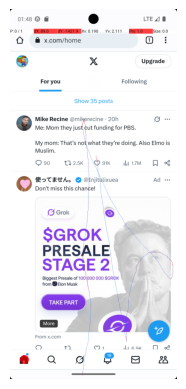

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

def show_point_on_image(rel_x, rel_y, point_color='red', point_size=30):
    """
    Display 'example.png' with a point marked at the given relative coordinates.

    Parameters:
    - rel_x: float, relative x-coordinate (0 to 1).
    - rel_y: float, relative y-coordinate (0 to 1).
    - point_color: str, color of the point (default: 'red').
    - point_size: int, size of the point (default: 50).
    """
    image_path = 'example.png'  # Hardcoded image path

    # Load image
    img = Image.open(image_path)
    width, height = img.size

    # Convert relative coordinates to absolute
    abs_x = rel_x * width
    abs_y = rel_y * height

    # Plot
    plt.imshow(img)
    plt.scatter([abs_x], [abs_y], color=point_color, s=point_size, alpha=0.7)
    plt.axis('off')
    plt.show()
show_point_on_image(points[0]['x'], points[0]['y'])


In [14]:
from PIL import Image
image = Image.open("example.png")

In [15]:
import time

In [16]:
start_time = time.time()

query = "the login button"
points = model.point(image, query)["points"]
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")


Time taken: 0.5298349857330322 seconds


In [5]:
from transformers.utils import is_flash_attn_2_available
is_flash_attn_2_available()


False

In [1]:
import torch

q_custom_before_rope = torch.load("q_custom_before_rope.pt")
k_custom_before_rope = torch.load("k_custom_before_rope.pt")
v_custom_before_rope = torch.load("v_custom_before_rope.pt")

q_custom_after_rope = torch.load("q_custom_after_rope.pt")
k_custom_after_rope = torch.load("k_custom_after_rope.pt")
v_custom_after_rope = torch.load("v_custom_after_rope.pt")

q_before_rot_main = torch.load("q_before_rot_main.pt")
k_before_rot_main = torch.load("k_before_rot_main.pt")
v_before_rot_main = torch.load("v_before_rot_main.pt")

q_after_rot_main = torch.load("q_after_rot_main.pt")
k_after_rot_main = torch.load("k_after_rot_main.pt")
v_after_rot_main = torch.load("v_after_rot_main.pt")







In [ ]:
torch.equal(q_before_rot_main, q_custom_before_rope)

True

In [3]:
torch.equal(q_after_rot_main, q_custom_after_rope)

True

In [4]:
torch.equal(v_after_rot_main, v_custom_after_rope)

True

In [5]:
torch.equal(k_after_rot_main, k_custom_after_rope)

True

In [5]:
v_after_rot_main.shape

torch.Size([1, 32, 730, 64])

In [6]:
v_custom_after_rope.shape

torch.Size([1, 32, 2048, 64])